<a href="https://colab.research.google.com/github/Luensmann/Bachelorarbeit/blob/main/Evaluation/Eval_multiCorp_cut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from transformers import AutoTokenizer, BertForTokenClassification, AutoModelForTokenClassification
from datasets import load_dataset

In [ ]:
# labels

labels = [
    'O',
    'B-Mutation',
    'I-Mutation',
    'B-Gene_protein',
    'I-Gene_protein'
]

id2label = {
     0: 'O',
     1: 'B-Mutation',
     2: 'I-Mutation',
     3: 'B-Gene_protein',
     4: 'I-Gene_protein'
}
label2id = {
    'O': 0,
    'B-Mutation': 1,
    'I-Mutation': 2,
    'B-Gene_protein': 3,
    'I-Gene_protein': 4
}


In [ ]:
dataset = load_dataset("Brizape/multiCorp_tokenized_split_LabelNorm_0404_dev")
dataset

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/2035 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1293 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/5165 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to C:/Users/pc/.cache/huggingface/datasets/Brizape___parquet/Brizape--multiCorp_tokenized_split_LabelNorm_0404_dev-1325c2765b5769c8/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    test: Dataset({
        features: ['id', 'tokens', 'ner_tags', 'texts', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 2035
    })
    validation: Dataset({
        features: ['id', 'tokens', 'ner_tags', 'texts', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 1293
    })
    train: Dataset({
        features: ['id', 'tokens', 'ner_tags', 'texts', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 5165
    })
})

In [ ]:
# get all texts for predictions
texts = []
for item in dataset["test"]:
    texts.append(item["texts"])
print(len(texts))

2035


In [ ]:
# get all gold labels aka true labels
gold_id_all = []
for item in dataset["test"]:
    #gold_id_all.append([id2label[i] for i in item["labels"][1:-1]])
    gold_id_all.append(item["labels"][1:-1])
print(len(gold_id_all))

2035


In [ ]:
# convert all IDs into labels
gold_label_all = []
for item in gold_id_all:
    gold_label_all.append([id2label[i] for i in item])
print(len(gold_label_all))

2035


In [ ]:
saveName = "norm_label_2e-05_0404_ES2_strict_tok"
model = "Brizape/MultiCorp_" + saveName
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForTokenClassification.from_pretrained(model)

Downloading:   0%|          | 0.00/434 [00:00<?, ?B/s]

C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:127: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\pc\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/706k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/942 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [ ]:
# gold_id_all - expected outputs in ids-format
# gold_label_all - expected outputs in label-format
# pred_label_all - all predicted labels in label-format
# pred_id_all - all predicted labels in id-format

# del all missmatches in both list:
# gold_id - expected outputs in ids-format
# gold_label - expected outputs in label-format
# pred_label - all predicted labels in label-format
# pred_id - all predicted labels in id-format

# gold_label_norm - normalisation; removed prefix
# pred_label_norm - normalisation; removed prefix

# y_true - for sklearn, no sublists
# y-pred - for sklearn, no sublists

In [ ]:
def predict(text):
    
    inputs = tokenizer(text, add_special_tokens=False, truncation=True, max_length=512, return_tensors="pt")
    if inputs['input_ids'].numel() == 0:
        print("input_ids is empty")
        return []
    
    with torch.no_grad():
        logits = model(**inputs).logits 
    predictions = torch.argmax(logits, dim=2)
    
    predicted_token_class = [model.config.id2label[t.item()] for t in predictions[0]]

    return predicted_token_class

In [ ]:
# predict all text
pred_label_all = []
for index, text in enumerate(texts):
    print(index, end=' ')
    pred_label_all.append(predict(text))
len(pred_label_all)

0 1 2 input_ids is empty
3 4 5 input_ids is empty
6 7 8 input_ids is empty
9 10 11 input_ids is empty
12 13 14 input_ids is empty
15 16 17 input_ids is empty
18 19 20 input_ids is empty
21 22 23 input_ids is empty
24 25 26 input_ids is empty
27 28 29 input_ids is empty
30 31 32 input_ids is empty
33 34 35 input_ids is empty
36 37 38 input_ids is empty
39 40 41 input_ids is empty
42 43 44 input_ids is empty
45 46 47 input_ids is empty
48 49 50 input_ids is empty
51 52 53 input_ids is empty
54 55 56 input_ids is empty
57 58 59 input_ids is empty
60 61 62 input_ids is empty
63 64 65 input_ids is empty
66 67 68 input_ids is empty
69 70 71 input_ids is empty
72 73 74 input_ids is empty
75 76 77 input_ids is empty
78 79 80 input_ids is empty
81 82 83 input_ids is empty
84 85 86 input_ids is empty
87 88 89 input_ids is empty
90 91 92 input_ids is empty
93 94 95 input_ids is empty
96 97 98 input_ids is empty
99 100 101 input_ids is empty
102 103 104 input_ids is empty
105 106 107 input_ids is 

2035

In [ ]:
# delete all special token
for i, (pred, gold) in enumerate(zip(pred_label_all, gold_label_all)):
    if len(pred) == 512 :
        for pred_tag, gold_tag in zip(pred, gold):
            print(pred_tag, gold_tag)
        pred_label_all[i] = pred[1:-1]
        print(pred)

O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O B-Gene_protein
O I-Gene_protein
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O B-Gene_protein
I-Gene_protein I-Gene_protein
O I-Gene_protein
O I-Gene_protein
O I-Gene_protein
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O B-Gene_protein
I-Gene_protein I-Gene_protein
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
B-Gene_pr

In [ ]:
# convert all IDs into labels

pred_id_all = []
for item in pred_label_all:
    pred_id_all.append([label2id[i] for i in item])
len(pred_id_all)

2035

In [ ]:
# gold_id_all - expected outputs in ids-format
# gold_label_all - expected outputs in label-format
# pred_label_all - all predicted labels in label-format
# pred_id_all - all predicted labels in id-format

# del all missmatches in both list:
# gold_id - expected outputs in ids-format
# gold_label - expected outputs in label-format
# pred_label - all predicted labels in label-format
# pred_id - all predicted labels in id-format

# y_true - for sklearn, no sublists
# y-pred - for sklearn, no sublists

In [ ]:
# checking if all gold and pred are same len
# reutrn list with indices of all missmatches
def check_len(gold, pred):
    missmatch_index = []
    for index, (gold, pred) in enumerate(zip(gold, pred)):
        if len(gold)==len(pred):
            #print("yes")
            continue
        else:
            missmatch_index.append(index)
    print("indices to del:" + str(missmatch_index))
    return missmatch_index

In [ ]:
# delete all missmatches from both sets
def del_missmatches(list1, list2, indices_to_del):
    for index in sorted(indices_to_del, reverse=True):
            del list1[index]
            del list2[index]

In [ ]:
# copy _all files
gold_id = gold_id_all[:]
gold_label = gold_label_all[:]
pred_id = pred_id_all[:]
pred_label = pred_label_all[:]
all = [gold_id, gold_label, pred_id, pred_label]
print('len befor:')
for list in all:
    print(len(list))
# get indicies with missmatch
# and delete them from both sets
indices_to_del = check_len(gold_id, pred_id)
del_missmatches(gold_id , pred_id, indices_to_del)
del_missmatches(gold_label , pred_label, indices_to_del)
print('len after:')
for list in all:
    print(len(list))
    


len befor:
2035
2035
2035
2035
indices to del:[794]
len after:
2034
2034
2034
2034


In [ ]:
i = 0
for pred, gold in zip(pred_label, gold_label):
    print(i, end="\n")
    i = i+1
    for label1, label2 in zip(pred, gold):
        OTag = label1 == label2
        if label1 != label2:
            print("(" + str(label1), ",", label2, end=') ')
    print(" ")

In [ ]:
############################################################
######################### seqeval ##########################
############################################################

In [ ]:
from seqeval.metrics import accuracy_score
from seqeval.metrics import classification_report
from seqeval.metrics import f1_score
from seqeval.scheme import IOB2

In [ ]:
# generate metrics
print("\n")
print("-"*60 + "\n" + "    SeqEval strict\n" + "-"*60)
print("strict: \n" + classification_report(gold_label, pred_label, scheme=IOB2, mode='strict'))

print("\n")
print("-"*60 + "\n" + "    SeqEval default\n" + "-"*60)
print("default: \n" + classification_report(gold_label, pred_label))



------------------------------------------------------------
    SeqEval strict
------------------------------------------------------------
strict: 
              precision    recall  f1-score   support

Gene_protein       0.52      0.38      0.44       746
    Mutation       0.70      0.49      0.58       987

   micro avg       0.62      0.45      0.52      1733
   macro avg       0.61      0.44      0.51      1733
weighted avg       0.62      0.45      0.52      1733



------------------------------------------------------------
    SeqEval default
------------------------------------------------------------
default: 
              precision    recall  f1-score   support

Gene_protein       0.46      0.39      0.42       746
    Mutation       0.60      0.49      0.54       987

   micro avg       0.54      0.45      0.49      1733
   macro avg       0.53      0.44      0.48      1733
weighted avg       0.54      0.45      0.49      1733



In [ ]:
# save reports as csv
import pandas as pd
report = pd.DataFrame(classification_report(gold_label, pred_label, mode='strict', digits=2, output_dict=True)).transpose()
print(report)
df = pd.DataFrame(report)#.transpose()
# With a Sheet Name
file_name = "mc" + saveName
report.to_excel('multiCorpus_cut\ ' + saveName + '.xlsx', index=True)

              precision    recall  f1-score  support
Gene_protein   0.519928  0.384718  0.442219    746.0
Mutation       0.695714  0.493414  0.577356    987.0
micro avg      0.618211  0.446624  0.518593   1733.0
macro avg      0.607821  0.439066  0.509788   1733.0
weighted avg   0.620044  0.446624  0.519184   1733.0


In [ ]:
#######################################################
####################### sklearn #######################
#######################################################

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sns
import evaluate

In [ ]:
y_pred = []
for sublist in pred_id:
    for label in sublist:
        y_pred.append(label)
len(y_pred)

197065

In [ ]:
y_true = []
for sublist in gold_id:
    for label in sublist:
        y_true.append(label)
len(y_true)

197065

In [ ]:
print(unique_labels(y_pred))
print(unique_labels(y_true))

[0 1 2 3 4]
[0 1 2 3 4]


In [ ]:
confusion_matrix(y_true, y_pred, labels=[i for i in range(5)])

array([[191352,     94,    146,    212,     83],
       [   390,    591,      3,      3,      0],
       [   847,     13,   1809,      3,      0],
       [   396,      1,      0,    326,     23],
       [   517,      1,      0,      8,    247]], dtype=int64)

In [ ]:
def plot(freal, predicted_token_class, label_list):
    label_names = labels #unique_labels(y_true)
    columns = [f'Pred{label}' for label in label_names]
    index = [f'Actual{label}' for label in label_names]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=[i for i in range(5)]), columns=columns, index=index)
    return table

In [ ]:
plot = plot(y_true, y_pred, labels)
print(plot)
df = pd.DataFrame(plot)#.transpose()
df.to_excel('multiCorpus_cut\ ' + saveName + 'confusion_.xlsx', index=True)

                       PredO  PredB-Mutation  PredI-Mutation  \
ActualO               191352              94             146   
ActualB-Mutation         390             591               3   
ActualI-Mutation         847              13            1809   
ActualB-Gene_protein     396               1               0   
ActualI-Gene_protein     517               1               0   

                      PredB-Gene_protein  PredI-Gene_protein  
ActualO                              212                  83  
ActualB-Mutation                       3                   0  
ActualI-Mutation                       3                   0  
ActualB-Gene_protein                 326                  23  
ActualI-Gene_protein                   8                 247  


In [ ]:
def plot_heat(freal, predicted_token_class, label_list):
    label_names = label_list #unique_labels(y_true)
    columns = [f'{label}' for label in label_names]
    index = [f'{label}' for label in label_names]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred, labels= [i for i in range(5)]), columns=columns, index=index)
    sns.set (rc = {'figure.figsize':(7, 6)})
    return sns.heatmap(table, annot=True, fmt='d', vmax=1810, cmap='YlOrBr')

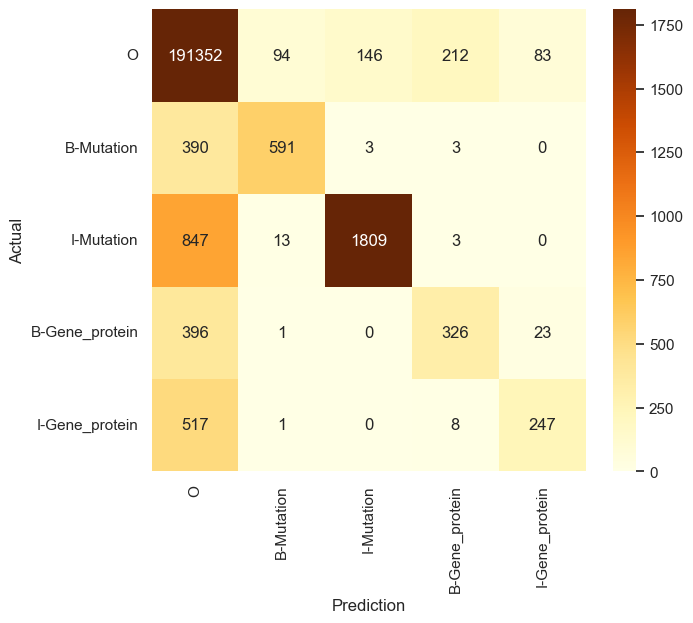

In [ ]:
ax = plot_heat(y_true, y_pred, labels)
ax.set(xlabel="Prediction", ylabel="Actual")
ax.figure.savefig("output.png")

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
exl = pd.DataFrame()


report = classification_report(y_true, y_pred, labels=[i for i in range(5)], target_names = labels, output_dict=True)
print(report)
df = pd.DataFrame(report).transpose()
print("\n")
print("-"*60 + "\n" + "    Label Report\n" + "-"*60)
print(df)
exl = exl.append(df, ignore_index=True)
exl.to_excel('multiCorpus_cut\ ' + saveName + '_labelReport.xlsx', index=True)#.transpose()

{'O': {'precision': 0.9888890037312276, 'recall': 0.9972119007540896, 'f1-score': 0.9930330133968536, 'support': 191887}, 'B-Mutation': {'precision': 0.8442857142857143, 'recall': 0.5987841945288754, 'f1-score': 0.7006520450503854, 'support': 987}, 'I-Mutation': {'precision': 0.9239019407558733, 'recall': 0.6770209580838323, 'f1-score': 0.7814254859611232, 'support': 2672}, 'B-Gene_protein': {'precision': 0.5905797101449275, 'recall': 0.43699731903485256, 'f1-score': 0.5023112480739599, 'support': 746}, 'I-Gene_protein': {'precision': 0.6997167138810199, 'recall': 0.31953428201811124, 'f1-score': 0.4387211367673179, 'support': 773}, 'accuracy': 0.9860959581863852, 'macro avg': {'precision': 0.8094746165597526, 'recall': 0.6059097308839523, 'f1-score': 0.683228585849928, 'support': 197065}, 'weighted avg': {'precision': 0.9846414823955136, 'recall': 0.9860959581863852, 'f1-score': 0.9846674647371132, 'support': 197065}}


------------------------------------------------------------
    

C:\Users\pc\AppData\Local\Temp\ipykernel_20584\589193717.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  exl = exl.append(df, ignore_index=True)


In [ ]:
i = 0
for (pred, gold, inIDs) in zip(pred_label, gold_label, dataset['test']['input_ids']):
    print(i, len(pred), len(inIDs[1:-1]), end="\n")
    i = i+1
    for i, (label1, label2, inID) in enumerate(zip(pred, gold, inIDs[1:-1])):
        print(i, tokenizer.decode(inID), ":(" + str(label1), ",", label2 + ')')
        if label1 != label2:
            print("#########################")
            #print(":(" + str(label1), ",", label2, end=')\n')
    print(" ")
    

0 27 27
0 a :(O , O)
1 novel :(O , O)
2 df :(O , O)
3 ##nb :(O , O)
4 ##31 :(O , O)
5 mutation :(O , O)
6 associated :(O , O)
7 with :(O , O)
8 us :(O , O)
9 ##her :(O , O)
10 type :(O , O)
11 2 :(O , O)
12 syndrome :(O , O)
13 showing :(O , O)
14 variable :(O , O)
15 degrees :(O , O)
16 of :(O , O)
17 auditory :(O , O)
18 loss :(O , O)
19 in :(O , O)
20 a :(O , O)
21 consang :(O , O)
22 ##uine :(O , O)
23 ##ous :(O , O)
24 portuguese :(O , O)
25 family :(O , O)
26 . :(O , O)
 
26 350 350
0 purpose :(O , O)
1 : :(O , O)
2 to :(O , O)
3 identify :(O , O)
4 the :(O , O)
5 genetic :(O , O)
6 defect :(O , O)
7 of :(O , O)
8 a :(O , O)
9 consang :(O , O)
10 ##uine :(O , O)
11 ##ous :(O , O)
12 portuguese :(O , O)
13 family :(O , O)
14 with :(O , O)
15 rod :(O , O)
16 - :(O , O)
17 cone :(O , O)
18 dystrophy :(O , O)
19 and :(O , O)
20 varying :(O , O)
21 degrees :(O , O)
22 of :(O , O)
23 decreased :(O , O)
24 audit :(O , O)
25 ##ion :(O , O)
26 . :(O , O)
27 methods :(O , O)
28 : :(O , O)
